In [5]:
!pip install numpy pandas keras seaborn matplotlib pandas_profiling factor_analyzer sklearn tensorflow

     |████████████████████████████████| 454.4 MB 83 kB/s s eta 0:00:01     |███████████████████████████▉    | 395.9 MB 67.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 8.1 kB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 5.6 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 27.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 40.1 MB/s eta 0:00:01
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
     |████████████████████████████████| 462 kB 50.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 72.6 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 781 kB 54.9 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 13.4 MB/s eta 0:00:01


     |████████████████████████████████| 4.9 MB 51.1 MB/s eta 0:00:01     |████████████████████████████████| 4.9 MB 51.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl size=78522 sha256=20951f58b53945e760b61645b82e9c2ec57def0a04b9b7a1739fdba208c04de7
  Stored in directory: /home/mariam/.cache/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=6826bada0bcd7826c3b0d32506b429346b9b15b289211c97f11b175e157f6a04
  Stored in directory: /home/mariam/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
ERROR: launchpadlib 1.10.13 requires testresources, which is not installed.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 3.3.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
  Attemptin

In [2]:
import numpy as np 
import pandas as pd
import keras
import seaborn as sns
import matplotlib
import warnings

%matplotlib inline

from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, median_absolute_error, r2_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow.keras import layers

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use(['dark_background'])

df_raw = pd.read_csv('SpotifyFeatures.csv')

In [12]:
# Columnas del dataset
df_raw.keys()

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

Se usaran las variables duration_ms, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, valence, tempo

La variable objetivo es popularity

* `duration_ms`: duración en milisegundos de la canción
* `danceability`: qué tan bailable es una canción, en una escala del 0.0 al 1.0
* `energy`: qué tan energética es una canción, en una escela del 0.0 al 1.0
* `key`: tono de la canción (https://es.wikipedia.org/wiki/Clases_de_tonos) que corresponde al índice (0-11) de cada nota
* `loudness`: qué tan ruidosa es una canción, en decibeles (dB)
* `mode`: indica si la modalidad de la canción es mayor (1) o menor (0)
* `speechiness`: qué tantas palabras 'habladas' están presentes en la pista, en una escala del 0.0 al 1.0
* `acousticness`: qué tan acústica es una canción, en una escala del 0.0 al 1.0
* `instrumentalness`: qué tan instrumental es la canción, en una escala del 0.0 al 1.0
* `valence`: qué tan positiva o animada es una canción, en una escala del 0.0 al 1.0
* `tempo`: el tempo de la canción en BPM

https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject


# EDA



## Datos erróneos

Se revisa si existen registros fuera de rango (potenciales errores)

In [13]:
df_raw.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


De acuerdo con las descripciones de las variables, obtenidas de la documentación de la API de Spotify, ninguna variable presenta valores máximos o mínimos fuera de lo esperable.

## Datos perdidos
Se revisa si existen registros nulos que correspondan a valores perdidos

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

No hay pérdida de datos

In [15]:
pd.isnull(df_raw).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [16]:
df_raw.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


## Outliers

In [17]:
Q1 = df_raw.quantile(0.25)
Q3 = df_raw.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popularity             26.0000
acousticness            0.6844
danceability            0.2570
duration_ms         82911.0000
energy                  0.4020
instrumentalness        0.0358
liveness                0.1666
loudness                6.2700
speechiness             0.0683
tempo                  46.0950
valence                 0.4230
dtype: float64


In [18]:
(Q1 - 1.5 * IQR)

popularity            -10.00000
acousticness           -0.98900
danceability            0.04950
duration_ms         58490.50000
energy                 -0.21800
instrumentalness       -0.05370
liveness               -0.15250
loudness              -21.17600
speechiness            -0.06575
tempo                  23.81650
valence                -0.39750
dtype: float64

In [19]:
(Q3 + 1.5 * IQR)

popularity              94.00000
acousticness             1.74860
danceability             1.07750
duration_ms         390134.50000
energy                   1.39000
instrumentalness         0.08950
liveness                 0.51390
loudness                 3.90400
speechiness              0.20745
tempo                  208.19650
valence                  1.29450
dtype: float64

### `popularity`

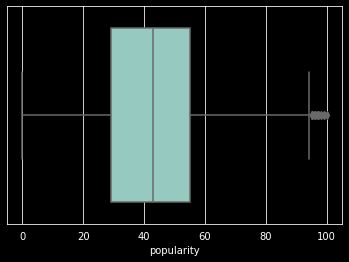

In [20]:
ax = sns.boxplot(x=df_raw['popularity'])

### `genre`

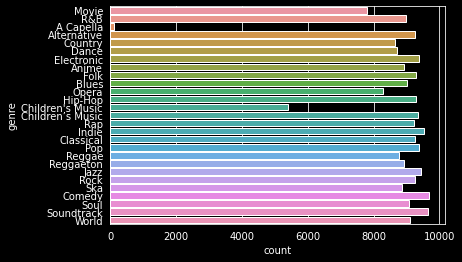

In [21]:
sns.countplot(y='genre', data=df_raw)
plt.show()

### `duration_ms`

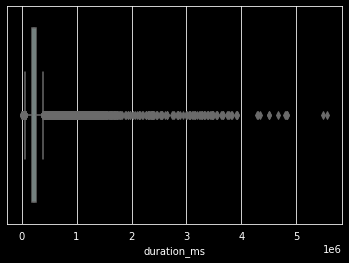

In [22]:
ax = sns.boxplot(x=df_raw['duration_ms'])

### `danceability`

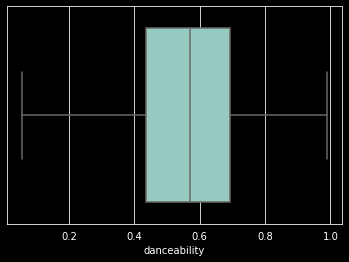

In [23]:
ax = sns.boxplot(x=df_raw['danceability'])

### `energy`

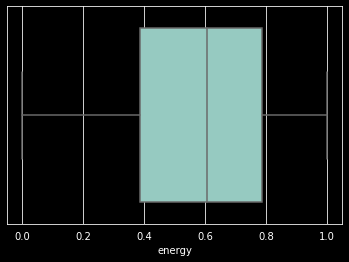

In [24]:
ax = sns.boxplot(x=df_raw['energy'])

### `key`

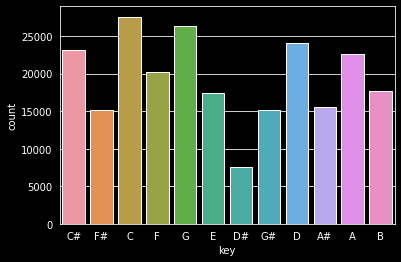

In [25]:
sns.countplot(x='key', data=df_raw)
plt.show()

### `loudness`

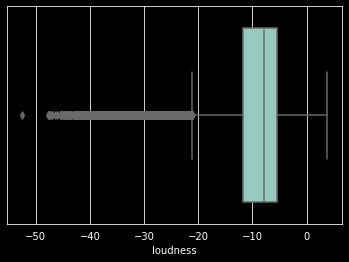

In [26]:
ax = sns.boxplot(x=df_raw['loudness'])

### `mode`

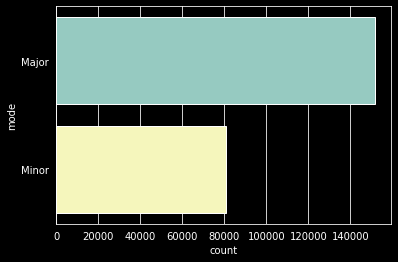

In [27]:
sns.countplot(y='mode', data=df_raw)
plt.show()

### `speechiness`

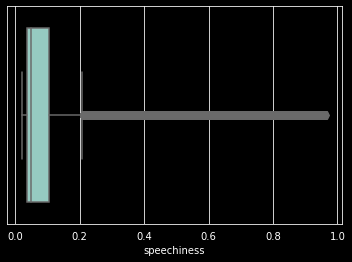

In [28]:
ax = sns.boxplot(x=df_raw['speechiness'])

### `acousticness`

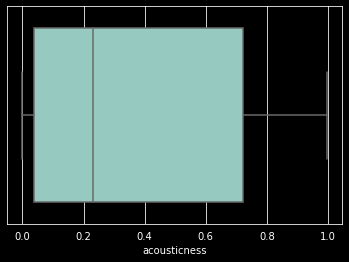

In [29]:
ax = sns.boxplot(x=df_raw['acousticness'])

### `instrumentalness`

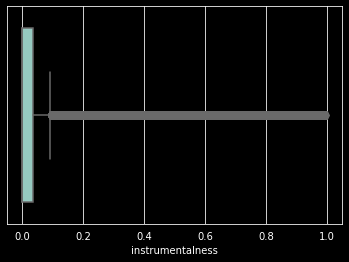

In [30]:
ax = sns.boxplot(x=df_raw['instrumentalness'])

### `valence`

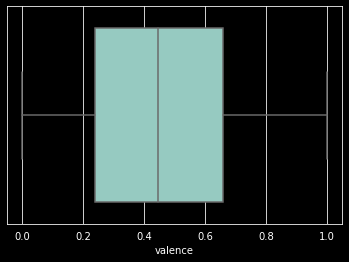

In [31]:
ax = sns.boxplot(x=df_raw['valence'])

### `tempo`

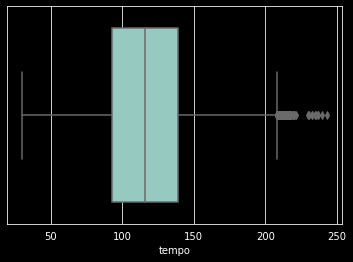

In [32]:
ax = sns.boxplot(x=df_raw['tempo'])

# Tratamiento de datos

In [3]:
# Se crea copia del dataframe original 

df = df_raw.copy()

In [4]:
# Se eliminan las columnas que no se utilizarán

df.drop(['artist_name', 'track_name', 'track_id', 'liveness', 'time_signature'], axis = 1, inplace = True)

In [5]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,loudness,mode,speechiness,tempo,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,C#,-1.828,Major,0.0525,166.969,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,F#,-5.559,Minor,0.0868,174.003,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,C,-13.879,Minor,0.0362,99.488,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,C#,-12.178,Major,0.0395,171.758,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,F,-21.150,Major,0.0456,140.576,0.390
